<a href="https://colab.research.google.com/github/JeffersonNery/MVP_Analise_de_Dados/blob/main/MVP_Analise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP ANÁLISE DE DADOS - Dados climatológicos das estações automáticas do INMET**
## **1 - INTRODUÇÃO**

O Instituto Nacional de Meteorologia INMET é um orgão do Ministério da Agricultura e Pecuária e tem como missão agregar valor à produção no Brasil por meio de informações meteorológicas. Esta missão é alcançada por meio de monitoramento, análise e previsão de tempo e de clima, que se fundamentam em pesquisa aplicada, trabalho em parceria e compartilhamento do conhecimento, com ênfase em resultados práticos e confiáveis. O Sistema de Coleta e Distribuição de Dados Meteorológicos do Instituto (temperatura, umidade relativa do ar, direção e velocidade do vento, pressão atmosférica, precipitação, entre outras variáveis) é dotado de estações de sondagem de ar superior (radiossonda); estações meteorológicas de superfície, operadas manualmente; e a maior rede de estações automáticas da América do Sul.

A rede de estações meteorológicas automáticas utiliza o que há de mais moderno internacionalmente. Os dados coletados por essa rede são disseminados, de forma democrática e gratuita, em tempo real, na página https://portal.inmet.gov.br, e têm aplicação em todos os setores da economia, de modo especial no agropecuário e em apoio à Defesa Civil.

## **2 - OBJETIVO**

Este MVP tem como objetivo a análise dos dados climatológicos referente as estações automáticas do INMET presentes em todo o território nacional visando responder as seguintes questões:

*   Qual a quantidade total de estações meteorológicas?
*   Como estão distribuídas as estações meteorológicas por estado?
*   Qual estado possui mais estações meteorológicas?
*   Qual estado possui menos estações meteorológicas?
*   Qual o status das estações meteorológicas?

## **3 - COLETA DOS DADOS**

**3.1 - EXTRAÇÃO DAS INFORMAÇÕES**

Para a extração das informações foram utilizadas duas fontes do INMET para obter os dataset's deste MVP:

*   FONTE 01: https://bdmep.inmet.gov.br/ (base de dados das estações meteorológicas)
*   FONTE 02: https://portal.inmet.gov.br/paginas/catalogoaut (catálogo das estações automáticas)

Este processo é simples onde você seleciona quais informações você precisa, cadastra seu e-mail onde você vai receber um link de confirmação de solicitação e após confirmar a solicitação você vai receber outro link para efetuar o download da base de dados em formato CSV (Comma-separated values - valores separados por vírgula).

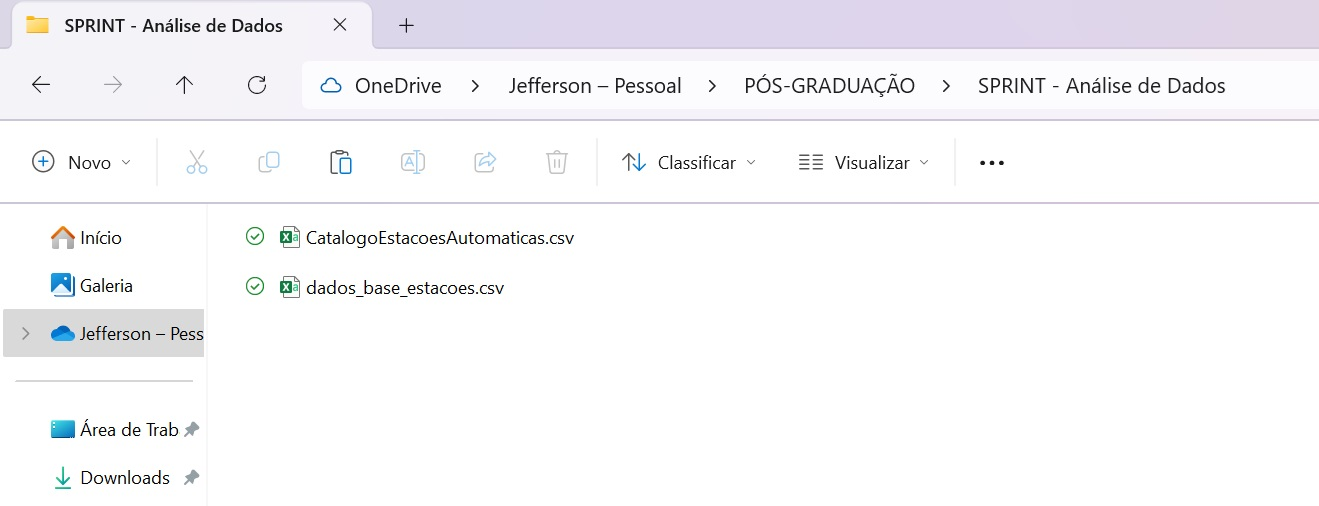

## **4 - CARGA DOS DADOS**

Foi criado um diretório no Github https://github.com/JeffersonNery/MVP_Analise_de_Dados onde foram armazenados as duas bases de dados. A base de dados CatalogoEstacoesAutomaticas.csv foi feito upload via browser, e a base dados_base_estacoes.csv devido ao seu tamanho ser maior que 100mb tive que utilizar o Git Large File Storage (Git LFS), onde especifiquei o arquivo e fiz o commit atráves do terminal.
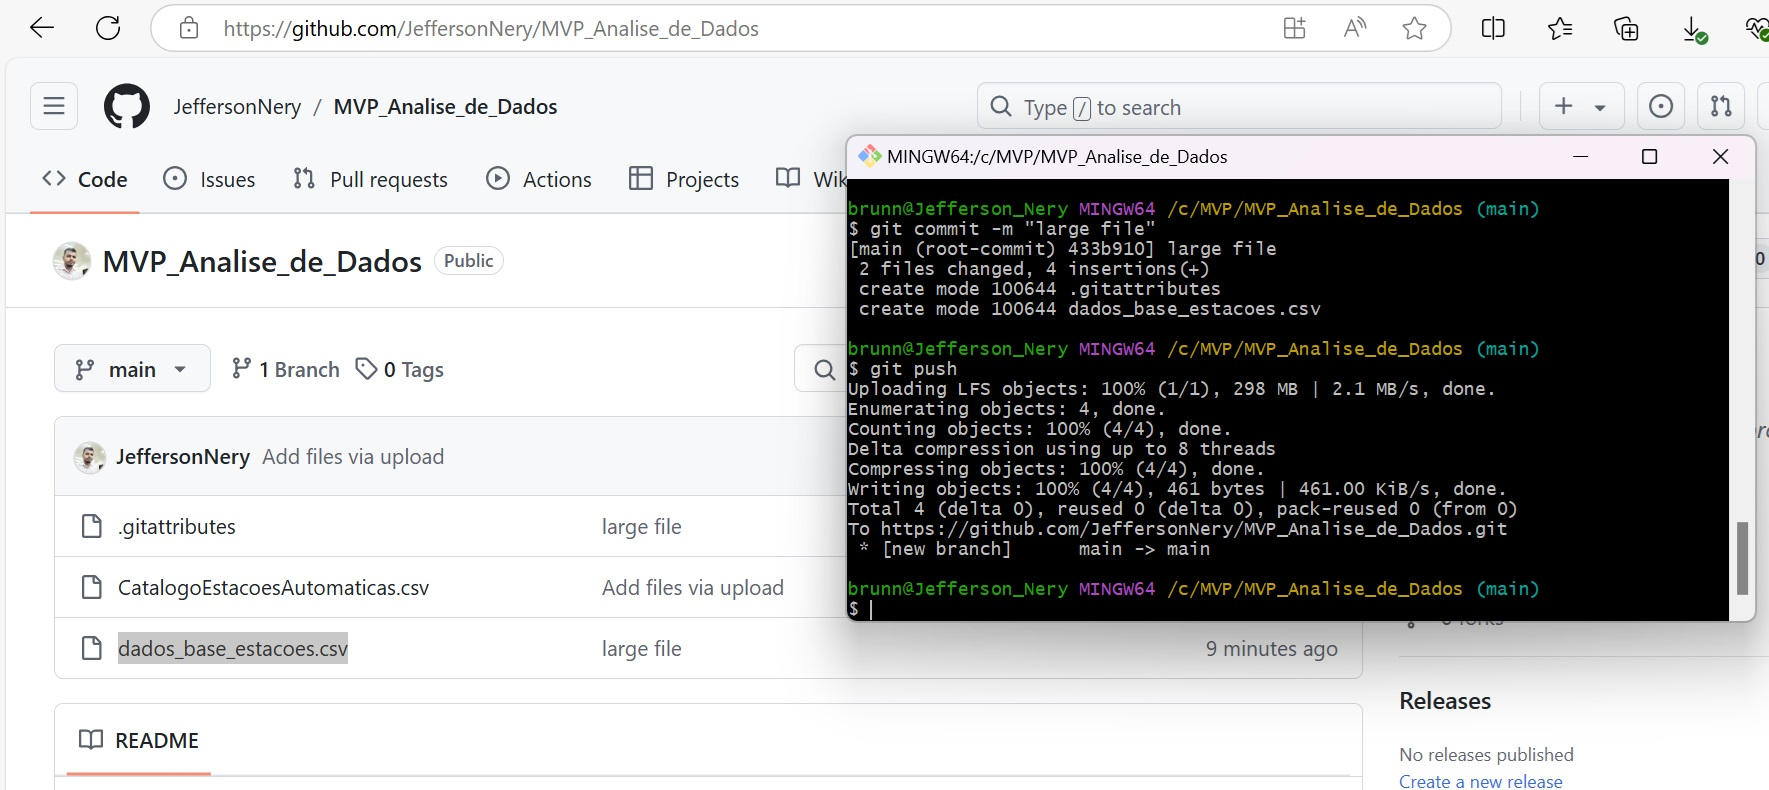